In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches


base_dir = '../outputs_processed/'

files = os.listdir(base_dir)

for i, f in enumerate(files):
    if i == 0:
        df = pd.read_json(open(f'{base_dir}{f}'))
    else:
        df2 = pd.read_json(open(f'{base_dir}{f}'))
        df = pd.concat([df, df2])

def set_axis_style(ax, labels):
    ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels)
    ax.set_xlim(0.25, len(labels) + 0.75)

In [2]:
df.columns

Index(['name', 'lat', 'lng', 'near_city', 'far_city', 'p_type', 'p_length',
       'state', 'city_b', 'lat_b', 'lng_b', 'dis'],
      dtype='object')

In [3]:
df.groupby(['p_type', 'p_length', 'state'])['dis'].mean()

p_type  p_length  state   
and     3-shot    no-state    2043.580248
                  state       1756.778816
close   3-shot    no-state    1312.020658
                  state        310.441550
far     3-shot    no-state    2561.481481
                  state       2570.833955
near    3-shot    no-state    1333.217845
                  state        335.603998
Name: dis, dtype: float64

In [4]:
df.loc[df.state == 'state']

,name,lat,lng,near_city,far_city,p_type,p_length,state,city_b,lat_b,lng_b,dis
0,"Albany, New York",42.65258,-73.75623,"New Haven, Connecticut","San Francisco, California",close,3-shot,state,"Montréal, Québec, Canada.",45.50884,-73.58781,317.656325
1,"Albany, New York",42.65258,-73.75623,"New Haven, Connecticut","San Francisco, California",close,3-shot,state,"Buffalo, New York.",42.88645,-78.87837,419.960931
2,"Albany, New York",42.65258,-73.75623,"New Haven, Connecticut","San Francisco, California",close,3-shot,state,"Woodstock, New York.",42.04092,-74.11820,74.201390
3,"Albany, New York",42.65258,-73.75623,"New Haven, Connecticut","San Francisco, California",close,3-shot,state,"\nSpringfield, Massachusetts.",42.10148,-72.58981,113.911315
4,"Albany, New York",42.65258,-73.75623,"New Haven, Connecticut","San Francisco, California",close,3-shot,state,"Burlington, Vermont.",44.47588,-73.21207,207.289559
...,...,...,...,...,...,...,...,...,...,...,...,...
22122,"Wilmington, North Carolina",34.22573,-77.94471,"Raleigh, North Carolina","Eugene, Oregon",near,3-shot,state,"Raleigh, North Carolina.",35.77210,-78.63861,182.874928
22123,"Wilmington, North Carolina",34.22573,-77.94471,"Raleigh, North Carolina","Eugene, Oregon",near,3-shot,state,"2. Raleigh, North Carolina 3",35.87064,-78.66242,193.878901
22124,"Wilmington, North Carolina",34.22573,-77.94471,"Raleigh, North Carolina","Eugene, Oregon",near,3-shot,state,"Pinehurst, North Carolina.",35.19543,-79.46948,176.299880
22125,"Wilmington, North Carolina",34.22573,-77.94471,"Raleigh, North Carolina","Eugene, Oregon",near,3-shot,state,"\nWilmington, Delaware.",39.74595,-75.54659,648.682417


In [5]:
def preprocess_for_plot(df, state='state', prep='near'):
    return df.loc[(df.p_type == prep) & (df.state == state)].dis.to_list()

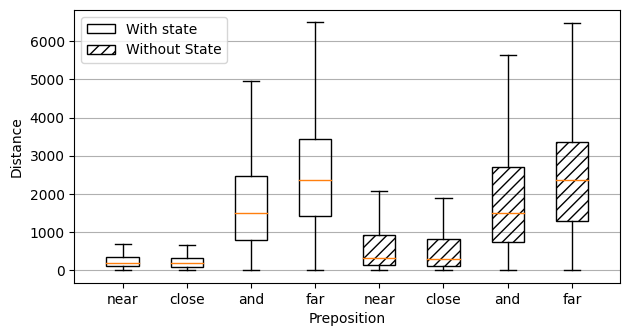

In [29]:

fig, axes = plt.subplots()

p = axes.boxplot(
    [
        preprocess_for_plot(df, 'state', 'near'),
        preprocess_for_plot(df, 'state', 'close'),
        preprocess_for_plot(df, 'state', 'and'),
        preprocess_for_plot(df, 'state', 'far'),
        preprocess_for_plot(df, 'no-state', 'near'),
        preprocess_for_plot(df, 'no-state', 'close'),
        preprocess_for_plot(df, 'no-state', 'and'),
        preprocess_for_plot(df, 'no-state', 'far'),
    ],
    showfliers=False,
    patch_artist=True
)
axes.yaxis.grid(True)
axes.set_ylabel('Distance')
axes.set_xlabel('Preposition')
labels = [
    'near',
    'close',
    'and',
    'far',
    'near',
    'close',
    'and',
    'far',
]
for i, box in enumerate(p['boxes']):
    if i in [0, 1, 2, 3]:
        box.set(hatch = '', fill=False)
    else:
        box.set(hatch = '///', fill=False)
set_axis_style(axes, labels)
# plt.xticks(rotation = 45)

circ1 = mpatches.Patch(hatch='', fill=False, label='With state')
circ2 = mpatches.Patch(hatch='///', fill=False, label='Without State')

axes.legend(handles = [circ1, circ2],loc=2)

axes.set_box_aspect(5/10)

plt.tight_layout()
# plt.show()
plt.savefig("plots/predicted_distances.png", dpi=300)